In [17]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [18]:
#Set Psudeorandom Seed
seed = 42

In [19]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/1y_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [20]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:37]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [21]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9155948553054662
[[879  67]
 [ 38 260]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       946
           1       0.80      0.87      0.83       298

    accuracy                           0.92      1244
   macro avg       0.88      0.90      0.89      1244
weighted avg       0.92      0.92      0.92      1244



In [23]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9107717041800643
[[904  42]
 [ 69 229]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       946
           1       0.85      0.77      0.80       298

    accuracy                           0.91      1244
   macro avg       0.89      0.86      0.87      1244
weighted avg       0.91      0.91      0.91      1244



In [24]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9107717041800643
[[901  45]
 [ 66 232]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       946
           1       0.84      0.78      0.81       298

    accuracy                           0.91      1244
   macro avg       0.88      0.87      0.87      1244
weighted avg       0.91      0.91      0.91      1244



In [25]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8963022508038585
[[887  59]
 [ 70 228]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       946
           1       0.79      0.77      0.78       298

    accuracy                           0.90      1244
   macro avg       0.86      0.85      0.86      1244
weighted avg       0.90      0.90      0.90      1244



In [26]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9212218649517685
[[922  24]
 [ 74 224]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       946
           1       0.90      0.75      0.82       298

    accuracy                           0.92      1244
   macro avg       0.91      0.86      0.89      1244
weighted avg       0.92      0.92      0.92      1244



In [27]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9196141479099679
[[901  45]
 [ 55 243]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       946
           1       0.84      0.82      0.83       298

    accuracy                           0.92      1244
   macro avg       0.89      0.88      0.89      1244
weighted avg       0.92      0.92      0.92      1244



In [28]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8906752411575563
[[872  74]
 [ 62 236]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       946
           1       0.76      0.79      0.78       298

    accuracy                           0.89      1244
   macro avg       0.85      0.86      0.85      1244
weighted avg       0.89      0.89      0.89      1244



In [29]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9228295819935691
[[913  33]
 [ 63 235]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       946
           1       0.88      0.79      0.83       298

    accuracy                           0.92      1244
   macro avg       0.91      0.88      0.89      1244
weighted avg       0.92      0.92      0.92      1244



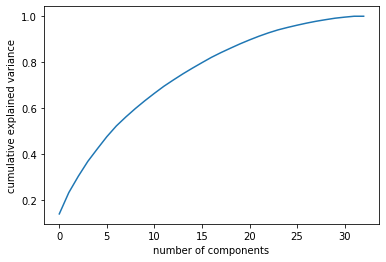

In [30]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [31]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [32]:
pca.n_components_

17

In [33]:
pca.explained_variance_ratio_

array([0.14020969, 0.09271871, 0.07113886, 0.06468396, 0.05451025,
       0.05297664, 0.04671929, 0.0391076 , 0.03656044, 0.03407112,
       0.03212373, 0.03072924, 0.02743015, 0.02653694, 0.02479972,
       0.02377709, 0.02322295])

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14020969, 0.2329284 , 0.30406726, 0.36875122, 0.42326147,
       0.47623811, 0.5229574 , 0.562065  , 0.59862544, 0.63269656,
       0.66482029, 0.69554953, 0.72297967, 0.74951662, 0.77431634,
       0.79809343, 0.82131638])

In [35]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [36]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9043408360128617
[[870  76]
 [ 43 255]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       946
           1       0.77      0.86      0.81       298

    accuracy                           0.90      1244
   macro avg       0.86      0.89      0.87      1244
weighted avg       0.91      0.90      0.91      1244



In [37]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8729903536977492
[[832 114]
 [ 44 254]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       946
           1       0.69      0.85      0.76       298

    accuracy                           0.87      1244
   macro avg       0.82      0.87      0.84      1244
weighted avg       0.89      0.87      0.88      1244



In [38]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8987138263665595
[[851  95]
 [ 31 267]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       946
           1       0.74      0.90      0.81       298

    accuracy                           0.90      1244
   macro avg       0.85      0.90      0.87      1244
weighted avg       0.91      0.90      0.90      1244



In [39]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8786173633440515
[[866  80]
 [ 71 227]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       946
           1       0.74      0.76      0.75       298

    accuracy                           0.88      1244
   macro avg       0.83      0.84      0.84      1244
weighted avg       0.88      0.88      0.88      1244



In [40]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7781350482315113
[[686 260]
 [ 16 282]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       946
           1       0.52      0.95      0.67       298

    accuracy                           0.78      1244
   macro avg       0.75      0.84      0.75      1244
weighted avg       0.87      0.78      0.79      1244



In [41]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7676848874598071
[[675 271]
 [ 18 280]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       946
           1       0.51      0.94      0.66       298

    accuracy                           0.77      1244
   macro avg       0.74      0.83      0.74      1244
weighted avg       0.86      0.77      0.78      1244



In [42]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7837620578778135
[[798 148]
 [121 177]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       946
           1       0.54      0.59      0.57       298

    accuracy                           0.78      1244
   macro avg       0.71      0.72      0.71      1244
weighted avg       0.79      0.78      0.79      1244



In [43]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9107717041800643
[[874  72]
 [ 39 259]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       946
           1       0.78      0.87      0.82       298

    accuracy                           0.91      1244
   macro avg       0.87      0.90      0.88      1244
weighted avg       0.92      0.91      0.91      1244

